# EDA
## 1. Transaction Table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('transaction.csv')
df2 = pd.read_csv('customer_address.csv')
df3 = pd.read_csv('customer_demographic.csv')

In [3]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Feature Engineering

In [6]:
#transaction date
df1.transaction_date = df1.transaction_date.astype('datetime64')

In [82]:
df_month = df1.transaction_date.dt.month.value_counts().to_frame(name='Transactions')
df_month.sort_index(inplace=True)

In [79]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

Text(0.5, 1.0, 'Month of October recorded the highest Number of Transactions')

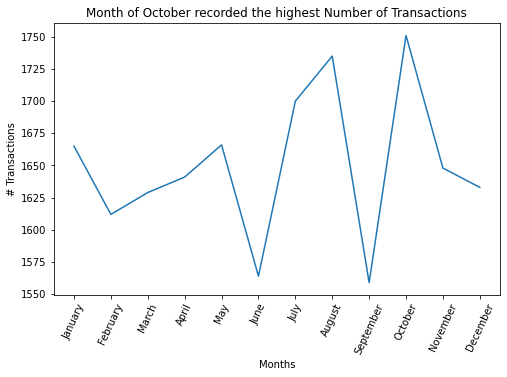

In [111]:
plt.figure(figsize=(8,5))
plt.plot(months,df_month['Transactions'])
plt.xlabel('Months')
plt.xticks(rotation=65)
plt.ylabel('# Transactions')
plt.title('Month of October recorded the highest Number of Transactions')


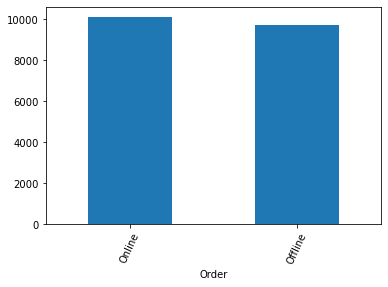

In [120]:
#online order
df1.online_order.value_counts().plot(kind='bar')
plt.xlabel('Order')
plt.xticks([0,1],['Online', 'Offline'], rotation=65);

In [121]:
#plots
def plot_cat(x, df=df1):
    plt.figure(figsize=(8,5))
    df[x].value_counts().plot(kind='bar')
    plt.xlabel(x)
    plt.xticks(rotation=65);
    
def plot_num(x, df=df1):
    plt.figure(figsize=(8,5))
    df[x].plot(kind='hist')
    plt.xlabel(x)
    #plt.xticks(rotation=65);

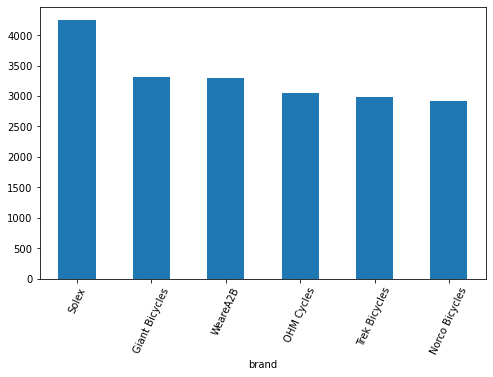

In [116]:
plot_cat('brand')

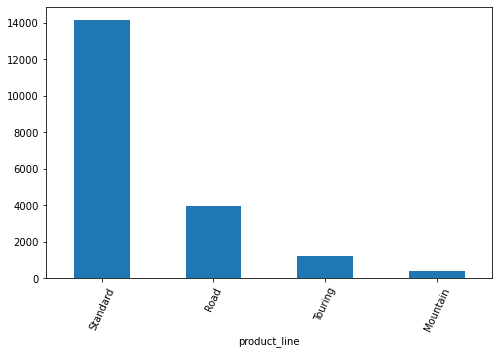

In [117]:
plot_cat('product_line')

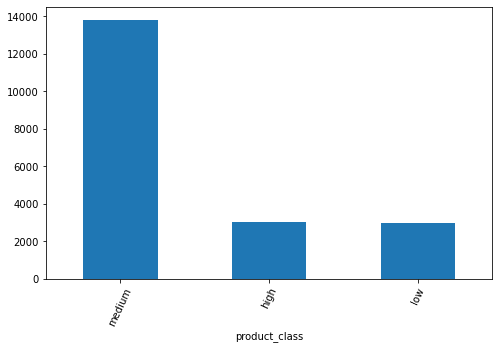

In [118]:
plot_cat('product_class')

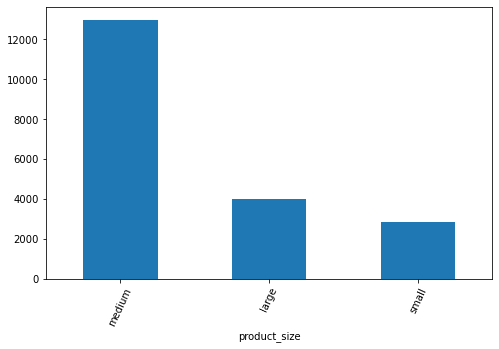

In [119]:
plot_cat('product_size')

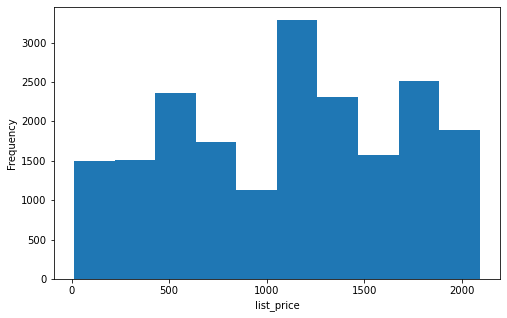

In [122]:
plot_num('list_price')

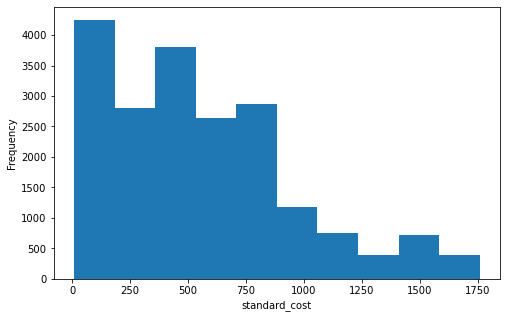

In [123]:
plot_num('standard_cost')

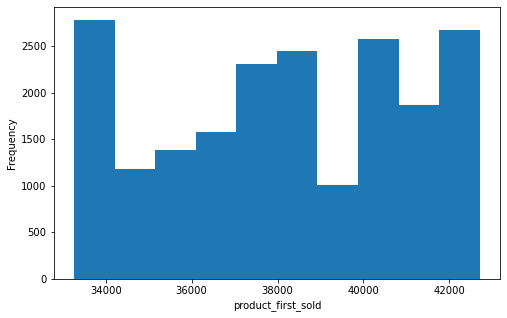

In [124]:
plot_num('product_first_sold')

In [142]:
df_group = df1.groupby('product_size')[['list_price','standard_cost']].sum()
df_group

,list_price,standard_cost
product_size,,
large,5853455.26,2.207280e+06
medium,12465961.98,5.584934e+06
small,3622264.50,3.219184e+06


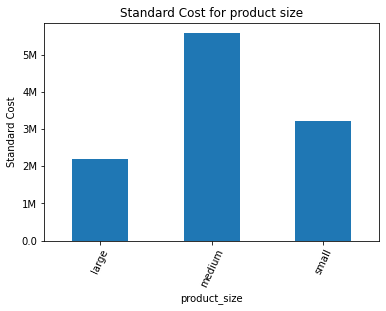

In [151]:
df_group.standard_cost.plot(kind='bar')
plt.yticks([0e6, 1e6, 2e6,3e6,4e6,5e6],['0.0','1M','2M','3M','4M','5M']);
plt.ylabel('Standard Cost')
plt.xticks(rotation=65);
plt.title('Standard Cost for product size');

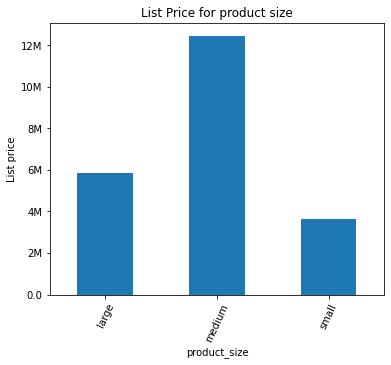

In [139]:
plt.figure(figsize=(6,5))
df1.groupby('product_size')['list_price'].sum().plot(kind='bar')
plt.yticks([0.0e7, 0.2e7, 0.4e7,0.6e7,0.8e7,1.0e7,1.2e7],['0.0','2M','4M','6M','8M','10M','12M']);
plt.ylabel('List price')
plt.xticks(rotation=65);
plt.title('List Price for product size');

## Customer Demographic Table

In [152]:
df2.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


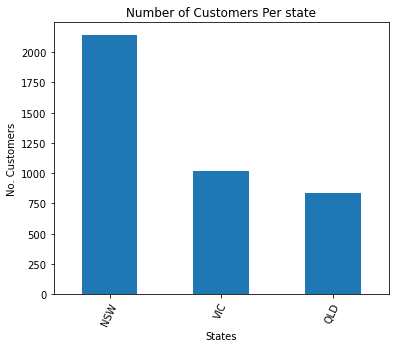

In [157]:
plt.figure(figsize=(6,5))
df2.state.value_counts().plot(kind='bar')
plt.xlabel('States')
plt.xticks(rotation=65)
plt.ylabel('No. Customers')
plt.title('Number of Customers Per state');

In [160]:
df_prop = df2.property_valuation.value_counts().to_frame(name='number')
df_prop.sort_index(inplace=True)

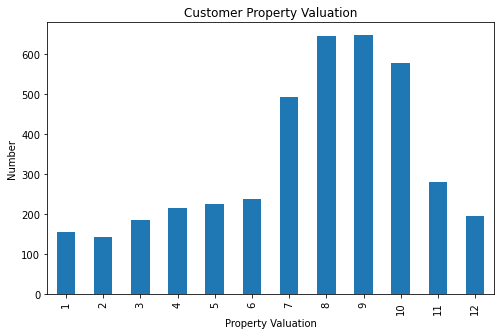

In [165]:
plt.figure(figsize=(8,5))
df_prop.number.plot(kind='bar')
plt.xlabel('Property Valuation')
plt.ylabel('Number')
plt.title('Customer Property Valuation');

## Customer Address

In [166]:
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,No,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,No,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,No,Yes,8.0


In [168]:
df3.DOB

0       1953-10-12
1       1980-12-16
2       1954-01-20
3       1961-10-03
4       1977-05-13
           ...    
3995    1975-08-09
3996    2001-07-13
3997    1978-01-30
3998    1973-10-24
3999    1991-11-05
Name: DOB, Length: 4000, dtype: object